In [21]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install plotly
!pip install scikit-learn
!pip install joblib
!pip install librosa
!pip install IPython
!pip install tensorflow


[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [22]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
from warnings import filterwarnings
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score, f1_score
from sklearn.model_selection import train_test_split,StratifiedKFold, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,VotingClassifier
from sklearn.preprocessing import minmax_scale, MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn import preprocessing
import joblib
#from xgboost import XGBClassifier
#from catboost import CatBoostClassifier
import librosa
import librosa.display
from IPython.display import Audio
import tensorflow as tf
#import tensorflow.keras.layers as L
#from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
#import tensorflow_addons as tfa
import time
import os
import random 
from sklearn.cluster import KMeans

In [23]:
GENERAL_PATH= 'Data'
df = pd.read_csv(f'{GENERAL_PATH}/features_3_sec.csv')

In [24]:
df.head(10)

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues
5,blues.00000.5.wav,66149,0.376670,0.089702,0.132618,0.003583,1994.915219,211700.619569,2152.767854,74263.873102,...,31.448069,-3.448373,34.284130,-0.416165,40.791092,-3.649625,32.457901,3.025218,28.892687,blues
6,blues.00000.6.wav,66149,0.379909,0.088827,0.130335,0.003166,1962.150096,177443.070045,2146.503479,98020.541422,...,33.954071,-2.068194,25.623655,1.428141,47.957699,-3.267124,39.382240,3.276939,25.999132,blues
7,blues.00000.7.wav,66149,0.331880,0.092119,0.140600,0.002546,1701.890924,35678.130616,1979.387612,36670.725886,...,38.456211,-3.637886,24.530296,-0.105148,26.716150,-2.016985,23.150423,0.210787,42.512966,blues
8,blues.00000.8.wav,66149,0.347877,0.094209,0.133130,0.002538,1746.473502,138073.931244,1887.619723,117069.920049,...,44.311455,-4.370029,29.873167,2.114592,33.843155,-2.264663,80.812393,3.758598,97.618835,blues
9,blues.00000.9.wav,66149,0.358061,0.082957,0.115312,0.001846,1763.948942,61493.423121,1874.195710,51944.921435,...,43.967834,-3.448304,48.671944,0.099792,41.839546,-7.677177,96.253654,0.791776,40.416420,blues


In [25]:
df.isna().sum()

filename                   0
length                     0
chroma_stft_mean           0
chroma_stft_var            0
rms_mean                   0
rms_var                    0
spectral_centroid_mean     0
spectral_centroid_var      0
spectral_bandwidth_mean    0
spectral_bandwidth_var     0
rolloff_mean               0
rolloff_var                0
zero_crossing_rate_mean    0
zero_crossing_rate_var     0
harmony_mean               0
harmony_var                0
perceptr_mean              0
perceptr_var               0
tempo                      0
mfcc1_mean                 0
mfcc1_var                  0
mfcc2_mean                 0
mfcc2_var                  0
mfcc3_mean                 0
mfcc3_var                  0
mfcc4_mean                 0
mfcc4_var                  0
mfcc5_mean                 0
mfcc5_var                  0
mfcc6_mean                 0
mfcc6_var                  0
mfcc7_mean                 0
mfcc7_var                  0
mfcc8_mean                 0
mfcc8_var     

In [26]:
df.shape

(9990, 60)

In [27]:
df.label.value_counts().reset_index()

,index,label
0,blues,1000
1,jazz,1000
2,metal,1000
3,pop,1000
4,reggae,1000
5,disco,999
6,classical,998
7,hiphop,998
8,rock,998
9,country,997


In [28]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
length,9990.0,6.614900e+04,0.000000e+00,6.614900e+04,66149.000000,6.614900e+04,6.614900e+04,6.614900e+04
chroma_stft_mean,9990.0,3.795341e-01,9.046576e-02,1.071078e-01,0.315698,3.847409e-01,4.424433e-01,7.494808e-01
chroma_stft_var,9990.0,8.487615e-02,9.636622e-03,1.534475e-02,0.079833,8.510794e-02,9.109229e-02,1.209643e-01
rms_mean,9990.0,1.308591e-01,6.854539e-02,9.534877e-04,0.083782,1.212534e-01,1.763277e-01,4.425668e-01
rms_var,9990.0,2.676388e-03,3.585628e-03,4.379535e-08,0.000615,1.491318e-03,3.130862e-03,3.261522e-02
spectral_centroid_mean,9990.0,2.199219e+03,7.518606e+02,4.727416e+02,1630.680158,2.208628e+03,2.712582e+03,5.432534e+03
spectral_centroid_var,9990.0,4.166727e+05,4.349644e+05,8.118813e+02,123196.130771,2.650692e+05,5.624152e+05,4.794119e+06
spectral_bandwidth_mean,9990.0,2.241386e+03,5.438544e+02,4.991629e+02,1887.455790,2.230576e+03,2.588341e+03,3.708148e+03
spectral_bandwidth_var,9990.0,1.182711e+05,1.013505e+05,1.183520e+03,48765.526957,8.996072e+04,1.585674e+05,1.235143e+06
rolloff_mean,9990.0,4.566077e+03,1.642065e+03,6.583363e+02,3378.311110,4.631378e+03,5.591635e+03,9.487446e+03


In [29]:
genres=df['label'].unique()
print(genres)

['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']


In [ ]:
# CNN

In [30]:
!pip install numpy
!pip install tensorflow
!pip install keras
!pip install librosa
!pip install matplotlib
!pip install IPython
!pip install scikit-learn
!pip install seaborn
!pip install livelossplot


[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [31]:
import random, os, glob # default python modules that let me randomise and manipulate files
import numpy as np # for data manipulation through arrays
import tensorflow as tf
from keras.models import Sequential # the model I will use
from keras.layers import Dropout, Dense, Conv2D, MaxPool2D, Flatten, Reshape, BatchNormalization, GlobalAveragePooling2D # layers I will incorporate
from keras.callbacks import EarlyStopping # for better training
from tensorflow.keras.applications import VGG19 # transfer learning model
from keras import backend
from livelossplot import PlotLossesKeras # to visualy display how my model improves as training progresses
import librosa # to demonstrate the creation of a mel spectrogram
from librosa.display import specshow
import matplotlib.pyplot as plt
import IPython.display as ipd
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [32]:
def setRandom():
    seed = 0 # random seed value
    os.environ["PYTHONHASHSEED"] = str(seed) # if this is not set, a random value is used to seed the hashes of some objects
    random.seed(seed) # sets the base python and numpy random seeds
    np.random.seed(seed)
    tf.random.set_seed(seed) # sets the tensorflow random seed
    tf.compat.v1.set_random_seed(seed)

<!--  Load an audio file from a specified path.
Remove any leading and trailing silence from the audio signal.
Compute a Mel spectrogram from the trimmed audio. A spectrogram represents how the power in different frequency bands changes over time.
Display the Mel spectrogram using Matplotlib, with axes turned off for a cleaner visualization.
Provide the option to listen to the trimmed audio.-->

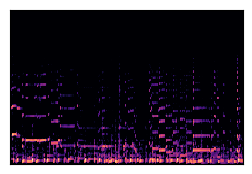

In [33]:
filePath = "Data/genres_original/jazz/jazz.00099.wav" # an example file

file, samplingRate = librosa.load(filePath)
example, _ = librosa.effects.trim(file)

hopLength = 512 # the number of samples between successive columns of the spectrogram

spectrogram = librosa.power_to_db(librosa.feature.melspectrogram(y = example, sr = samplingRate, n_fft = 2048, hop_length = hopLength, n_mels = 128, power = 4.0), ref = np.max)

plt.figure(figsize = (3, 2))
librosa.display.specshow(spectrogram, sr = samplingRate, hop_length = hopLength, x_axis = "off", y_axis = "off")
ipd.Audio(example, rate = samplingRate)

In [34]:
source = "Data/images_original" 
genres = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"] # list with the genre folder names

for genre in genres: # iterate through each genre folder
    path = os.path.join(source, genre)
    pngs = [i for i in os.listdir(path) if i[-4:] == ".png"] # get a list of .png files in the genre folder
    print(f"Size of {genre} dataset: {len(pngs)} files.")

Size of blues dataset: 100 files.
Size of classical dataset: 100 files.
Size of country dataset: 100 files.
Size of disco dataset: 100 files.
Size of hiphop dataset: 100 files.
Size of jazz dataset: 99 files.
Size of metal dataset: 100 files.
Size of pop dataset: 100 files.
Size of reggae dataset: 100 files.
Size of rock dataset: 100 files.


In [35]:
# setRandom()
split = [80, 10, 10]
train, val, test = {}, {}, {} # empty dictionaries to store the filepaths
trainLen, valLen, testLen = {}, {}, {} # empty dictionaries to store the number of files under each genre for each dataset
dictionaries = [train, val, test]

for d in dictionaries:
    if d == train: num = slice(0, split[0])
    elif d == val: num = slice(split[0], split[0] + split[1])
    else: num = slice(split[0] + split[1], split[0] + split[1] + split[2])
    for genre in genres: # iterate through each genre folder
        path = os.path.join(source, genre)
        pngs = glob.glob(os.path.join(path, "*.png")) # get a list of .png filepaths in the genre folder
        selected = pngs[num] # take the first 80 files
        d[genre] = selected # store the selected files in the dictionary

lenDictionaries = [{genre: len(d[genre]) for genre in genres} for d in dictionaries]        

print(f"\033[1mTraining:\033[0m {lenDictionaries[0]}")
print(f"\033[1mValidation:\033[0m {lenDictionaries[1]}")
print(f"\033[1mTest:\033[0m {lenDictionaries[2]}")

Training: {'blues': 80, 'classical': 80, 'country': 80, 'disco': 80, 'hiphop': 80, 'jazz': 80, 'metal': 80, 'pop': 80, 'reggae': 80, 'rock': 80}
Validation: {'blues': 10, 'classical': 10, 'country': 10, 'disco': 10, 'hiphop': 10, 'jazz': 10, 'metal': 10, 'pop': 10, 'reggae': 10, 'rock': 10}
Test: {'blues': 10, 'classical': 10, 'country': 10, 'disco': 10, 'hiphop': 10, 'jazz': 9, 'metal': 10, 'pop': 10, 'reggae': 10, 'rock': 10}


In [36]:
batchSize = 32 # typical batch size for a neural network
genreMap = {
    "blues": 0,
    "classical": 1,
    "country": 2,
    "disco": 3,
    "hiphop": 4,
    "jazz": 5,
    "metal": 6,
    "pop": 7,
    "reggae": 8,
    "rock": 9
}
inverseGenreMap = {value: key for key, value in genreMap.items()}
print(inverseGenreMap)

def createDataset(d):
    imgSize = (288, 432) # define image and batch parameters
    imageList, labelList = [], [] # create lists to store images and labels
    
    for genre, paths in d.items():
        for path in paths:
            image = tf.cast(tf.image.resize(tf.image.decode_png(tf.io.read_file(path), channels = 3), imgSize), tf.float32) / 255.0 # normalise pixel values between 0 and 1 (preprocessing!)
            imageList.append(image)
            labelList.append(genreMap[genre]) # convert genre to its integer label

    dataset = tf.data.Dataset.from_tensor_slices((imageList, labelList)).shuffle(buffer_size=len(imageList)).batch(batchSize) # create and return tensorflow dataset
    return(dataset)

def prep(ds):
    out = (
        ds.map(lambda image, label: (tf.image.convert_image_dtype(image, tf.float32), label)) # modifies the image tensor's data type to floats
        .cache() # cache dataset elements in memory or on disk to speed up data loading
        .prefetch(buffer_size = tf.data.experimental.AUTOTUNE) # prefetch dataset elements in the background and automatically optimise data loading
    )
    return out # return the prepared and optimised dataset

training, validation, testing = prep(createDataset(train)), prep(createDataset(val)), prep(createDataset(test))
print("Datasets created.") # to let me know when it's finished running (:

{0: 'blues', 1: 'classical', 2: 'country', 3: 'disco', 4: 'hiphop', 5: 'jazz', 6: 'metal', 7: 'pop', 8: 'reggae', 9: 'rock'}
Datasets created.


In [37]:
from keras.callbacks import EarlyStopping

In [38]:
inputShape = [288, 432, 3] 

earlyStopping = EarlyStopping( 
    min_delta = 0.001, 
    patience = 20, 
    restore_best_weights = True 
)

In [39]:
pip install --upgrade certifi


[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [40]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [41]:
from tensorflow.keras.applications import InceptionV3

In [42]:
weights_path = 'path/to/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'


In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, BatchNormalization, Dense, Dropout

In [44]:
 # transfer learning model
baseModel = InceptionV3(input_shape = inputShape, weights = "imagenet", include_top = False, pooling = "avg")

for layer in baseModel.layers:
    layer.trainable = False # freeze the pre-trained layers

transfer = Sequential([
    baseModel,
    
    Flatten(),
    BatchNormalization(),
    Dense(512, activation = "relu"),
    Dropout(0.3),
    Dense(256, activation = "relu"),
    Dropout(0.3), # dropout layer to prevent overfitting
    Dense(128, activation = "relu"),
    Dropout(0.3),
    Dense(len(genres), activation = "softmax")
])

transfer.compile(optimizer = tf.keras.optimizers.SGD(lr = 0.0001), loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
transfer.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2048)              21802784  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 batch_normalization_377 (B  (None, 2048)              8192      
 atchNormalization)                                              
                                                                 
 dense_3 (Dense)             (None, 512)               1049088   
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                        

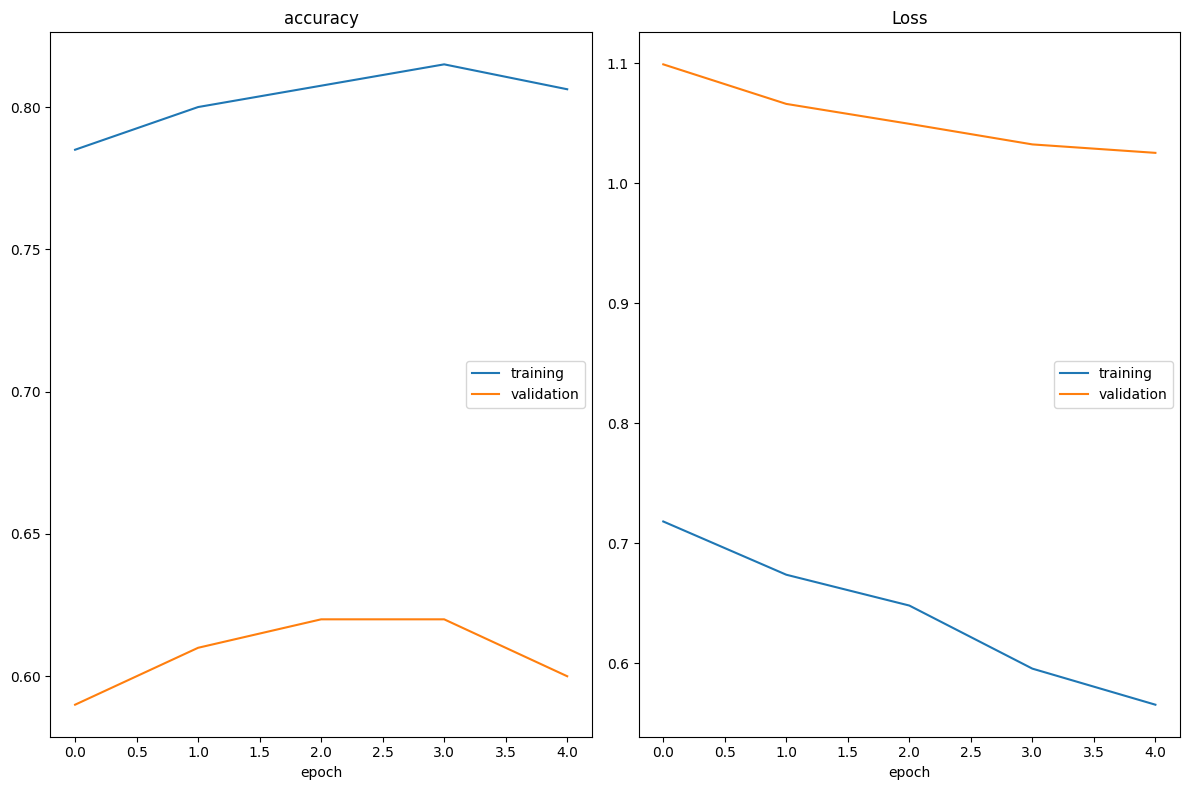

accuracy
	training         	 (min:    0.785, max:    0.815, cur:    0.806)
	validation       	 (min:    0.590, max:    0.620, cur:    0.600)
Loss
	training         	 (min:    0.566, max:    0.718, cur:    0.566)
	validation       	 (min:    1.026, max:    1.099, cur:    1.026)
25/25 [==============================] - 39s 2s/step - loss: 0.5656 - accuracy: 0.8062 - val_loss: 1.0255 - val_accuracy: 0.6000


In [46]:
setRandom()
transferHistory = transfer.fit(training, validation_data = validation, batch_size = batchSize, epochs = 5, verbose = 1, callbacks = [earlyStopping, PlotLossesKeras()])

In [47]:
cnn = Sequential([
    BatchNormalization(input_shape = inputShape),
    
    Conv2D(32, (3, 3), activation = "relu"),
    MaxPool2D((2, 2)),
    
    Conv2D(64, (3, 3), activation = "relu"),
    MaxPool2D((2, 2)),
    
    Conv2D(128, (3, 3), activation = "relu"),
    MaxPool2D((2, 2)),
    
    Conv2D(256, (3, 3), activation = "relu"),
    MaxPool2D((2, 2)),
    
    Conv2D(512, (3, 3), activation = "relu"),
    MaxPool2D((2, 2)),
    
    Flatten(),
    Dense(1024, activation = "relu"),
    Dropout(0.5),
    Dense(512, activation = "relu"),
    Dropout(0.5),
    BatchNormalization(),
    Dense(len(genres), activation = "softmax")
])

cnn.compile(optimizer = tf.keras.optimizers.SGD(lr = 0.001), loss = "sparse_categorical_crossentropy", metrics = ["accuracy"]) # "sparse_categorical_crossentropy" because labels are integers
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_378 (B  (None, 288, 432, 3)       12        
 atchNormalization)                                              
                                                                 
 conv2d_376 (Conv2D)         (None, 286, 430, 32)      896       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 143, 215, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_377 (Conv2D)         (None, 141, 213, 64)      18496     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 70, 106, 64)       0         
 ng2D)                                                           
                                                      

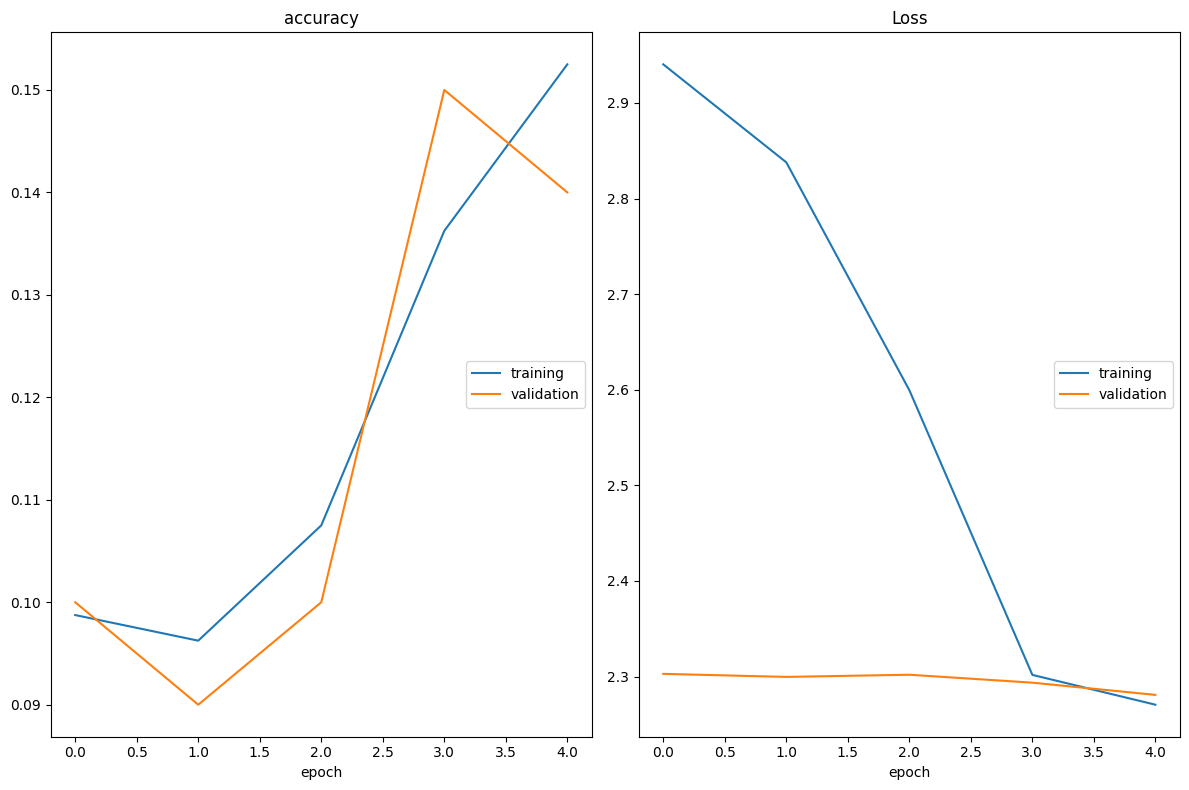

accuracy
	training         	 (min:    0.096, max:    0.153, cur:    0.153)
	validation       	 (min:    0.090, max:    0.150, cur:    0.140)
Loss
	training         	 (min:    2.271, max:    2.940, cur:    2.271)
	validation       	 (min:    2.281, max:    2.303, cur:    2.281)
25/25 [==============================] - 41s 2s/step - loss: 2.2706 - accuracy: 0.1525 - val_loss: 2.2809 - val_accuracy: 0.1400


In [48]:
setRandom()
cnn.fit(training, validation_data = validation, batch_size = batchSize, epochs = 5, verbose = 1, callbacks = [earlyStopping, PlotLossesKeras()])

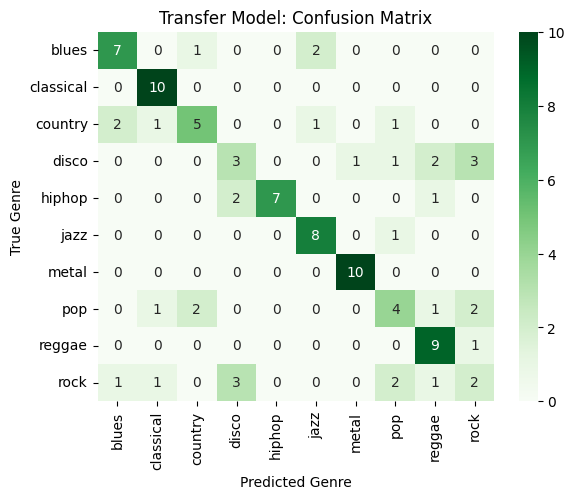

Transfer Model
Training Accuracy: 92.125% 
Train Loss: 0.4389

Validation Accuracy: 60.0% 
Test Loss: 1.0255

Testing Accuracy: 65.6566% 
Test Loss: 1.1823


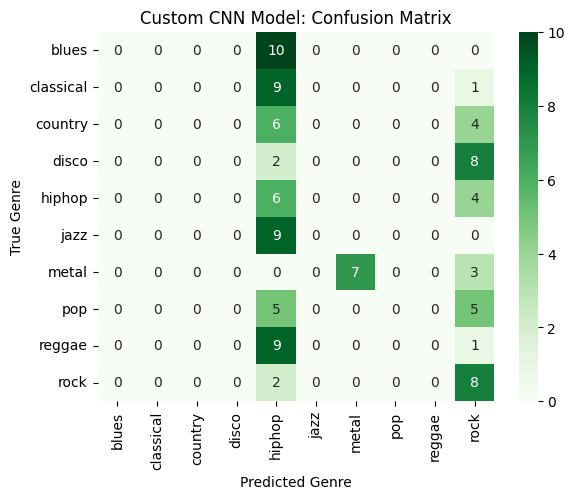

Custom CNN Model
Training Accuracy: 21.25% 
Train Loss: 2.2786

Validation Accuracy: 14.0% 
Test Loss: 2.2809

Testing Accuracy: 21.2121% 
Test Loss: 2.2773


In [49]:
def confusionMatrix(model, name):
    trueLabels = np.concatenate([y for x, y in testing], axis = 0) # get the true labels from the testing dataset

    predictedLabels = np.argmax(model.predict(testing, verbose = 0), axis = 1) # get the predicted labels from the model

    matrix = confusion_matrix(trueLabels, predictedLabels) # create the confusion matrix

    plt.figure() # plot the confusion matrix using seaborn for the heatmap
    sns.heatmap(matrix, annot = True, cmap = "Greens", xticklabels = genres, yticklabels = genres)
    plt.xlabel("Predicted Genre")
    plt.ylabel("True Genre")
    plt.title(f"{name} Model: Confusion Matrix")
    plt.show()
    
    trainStats, valStats, testStats = model.evaluate(training, verbose = 0), model.evaluate(validation, verbose = 0), model.evaluate(testing, verbose = 0)
    print(f"\033[1m{name} Model\033[0m")
    print(f"Training Accuracy: {round(trainStats[1] * 100, 4)}% \nTrain Loss: {round(trainStats[0], 4)}\n")
    print(f"Validation Accuracy: {round(valStats[1] * 100, 4)}% \nTest Loss: {round(valStats[0], 4)}\n")
    print(f"Testing Accuracy: {round(testStats[1] * 100, 4)}% \nTest Loss: {round(testStats[0], 4)}")

confusionMatrix(transfer, "Transfer")
confusionMatrix(cnn, "Custom CNN")

<Figure size 800x600 with 0 Axes>

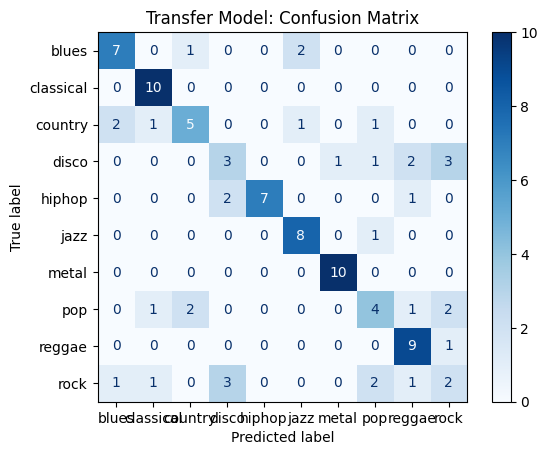

Transfer Model
Training Accuracy: 92.125% 
Train Loss: 0.4389

Validation Accuracy: 60.0% 
Test Loss: 1.0255

Testing Accuracy: 65.6566% 
Test Loss: 1.1823


<Figure size 800x600 with 0 Axes>

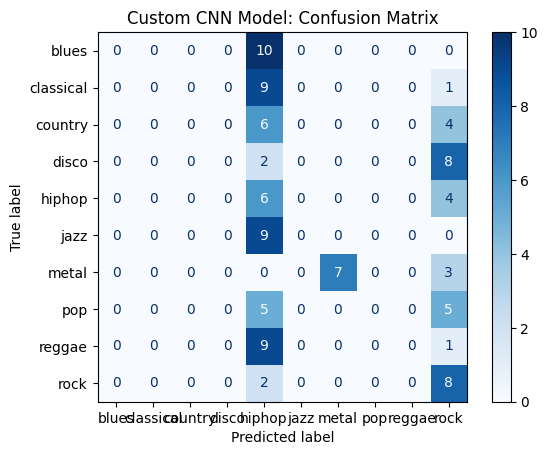

Custom CNN Model
Training Accuracy: 21.25% 
Train Loss: 2.2786

Validation Accuracy: 14.0% 
Test Loss: 2.2809

Testing Accuracy: 21.2121% 
Test Loss: 2.2773


In [51]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def confusionMatrix(model, name):
    trueLabels = np.concatenate([y for x, y in testing], axis=0)
    predictedLabels = np.argmax(model.predict(testing, verbose=0), axis=1)
    matrix = confusion_matrix(trueLabels, predictedLabels)

    # Plot confusion matrix using scikit-learn's ConfusionMatrixDisplay
    disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=genres)
    plt.figure(figsize=(8, 6))
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f"{name} Model: Confusion Matrix")
    plt.show()

    trainStats, valStats, testStats = model.evaluate(training, verbose=0), model.evaluate(validation, verbose=0), model.evaluate(testing, verbose=0)
    print(f"\033[1m{name} Model\033[0m")
    print(f"Training Accuracy: {round(trainStats[1] * 100, 4)}% \nTrain Loss: {round(trainStats[0], 4)}\n")
    print(f"Validation Accuracy: {round(valStats[1] * 100, 4)}% \nTest Loss: {round(valStats[0], 4)}\n")
    print(f"Testing Accuracy: {round(testStats[1] * 100, 4)}% \nTest Loss: {round(testStats[0], 4)}")

confusionMatrix(transfer, "Transfer")
confusionMatrix(cnn, "Custom CNN")


In [50]:
setRandom()
genre, paths = random.choice(list(test.items())) # chooses a random genre and corresponding list of paths
path = paths[random.randint(0, len(paths) - 1)] # chooses a random path within that list
soundPath = f"{path[:-4]}.wav".replace("images_original", "genres_original") # creates a new variable for the image path's respective audio file path
soundPath = soundPath[:-9] + "." + soundPath[-9:]

image = tf.image.decode_png(tf.io.read_file(path), channels = 3)
image = tf.image.resize(image, inputShape[:2])  # resize the image to the input shape of the model
image = tf.cast(image, tf.float32) / 255.0 # normalise pixel values
image = np.expand_dims(image, axis = 0) # expand dimensions to match the batch size (even though it's just one image)

predictions = cnn.predict(image) # make a prediction using the custom cnn model
predictedGenre = inverseGenreMap[np.argmax(predictions)] # get the predicted class label

print(f"\033[1mPredicted genre:\033[0m {predictedGenre}")
print(f"\033[1mActual genre:\033[0m {genre}")
print(f"\033[1mFilepath:\033[0m {soundPath[71:]}")
ipd.Audio(soundPath)

1/1 [==============================] - 0s 66ms/step
Predicted genre: rock
Actual genre: metal
Filepath: 
